In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = 'nyc-rolling-sales.csv'
nyc_sales_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
nyc_sales_data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [ ]:
# Display the column names
nyc_sales_data.columns.tolist()

['Unnamed: 0',
 'BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BLOCK',
 'LOT',
 'EASE-MENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'APARTMENT NUMBER',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'BUILDING CLASS AT TIME OF SALE',
 'SALE PRICE',
 'SALE DATE']

In [ ]:
# Count of missing values in each column
missing_values = nyc_sales_data.isna().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicate_rows = nyc_sales_data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [ ]:
# Convert 'SALE PRICE' to numeric, replacing non-numeric values with NaN
nyc_sales_data['SALE PRICE'] = pd.to_numeric(nyc_sales_data['SALE PRICE'], errors='coerce')

In [ ]:
# Calculate the average sale price and fill missing values with this average
average_sale_price = nyc_sales_data['SALE PRICE'].mean()
nyc_sales_data['SALE PRICE'].fillna(average_sale_price, inplace=True)

In [ ]:
# Convert 'SALE DATE' to datetime format
nyc_sales_data['SALE DATE'] = pd.to_datetime(nyc_sales_data['SALE DATE'])

In [ ]:
# Convert 'LAND SQUARE FEET' and 'GROSS SQUARE FEET' to numeric
nyc_sales_data['LAND SQUARE FEET'] = pd.to_numeric(nyc_sales_data['LAND SQUARE FEET'], errors='coerce')
nyc_sales_data['GROSS SQUARE FEET'] = pd.to_numeric(nyc_sales_data['GROSS SQUARE FEET'], errors='coerce')

In [ ]:
nyc_sales_data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6.625000e+06,2017-07-19
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,1.276456e+06,2016-12-14
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,1.276456e+06,2016-12-09
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3.936272e+06,2016-09-23
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8.000000e+06,2016-11-17


In [ ]:
# Count of missing values in each column
missing_values = nyc_sales_data.isna().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64


In [ ]:
# Calculate the mean or median
land_sqft_mean = nyc_sales_data['LAND SQUARE FEET'].mean()
gross_sqft_mean = nyc_sales_data['GROSS SQUARE FEET'].mean()

# You can also use median if it's more appropriate
# land_sqft_median = nyc_sales_data['LAND SQUARE FEET'].median()
# gross_sqft_median = nyc_sales_data['GROSS SQUARE FEET'].median()

# Apply imputation
nyc_sales_data['LAND SQUARE FEET'].fillna(land_sqft_mean, inplace=True)
nyc_sales_data['GROSS SQUARE FEET'].fillna(gross_sqft_mean, inplace=True)

# Verify imputation
missing_values_after = nyc_sales_data[['LAND SQUARE FEET', 'GROSS SQUARE FEET']].isna().sum()
print("Missing values after imputation:\n", missing_values_after)

Missing values after imputation:
 LAND SQUARE FEET     0
GROSS SQUARE FEET    0
dtype: int64


In [ ]:
# Check for missing values in each column after imputation
missing_values_after_analysis = nyc_sales_data.isna().sum()
print("Missing values in each column after analysis:\n", missing_values_after_analysis)

Missing values in each column after analysis:
 Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64


# Exploratory Data Analysis

In [ ]:
# Summary statistics for numerical columns
summary_stats = nyc_sales_data.describe()

# Display the summary statistics
print(summary_stats)

         Unnamed: 0       BOROUGH         BLOCK           LOT      ZIP CODE  \
count  84548.000000  84548.000000  84548.000000  84548.000000  84548.000000   
mean   10344.359878      2.998758   4237.218976    376.224015  10731.991614   
std     7151.779436      1.289790   3568.263407    658.136814   1290.879147   
min        4.000000      1.000000      1.000000      1.000000      0.000000   
25%     4231.000000      2.000000   1322.750000     22.000000  10305.000000   
50%     8942.000000      3.000000   3311.000000     50.000000  11209.000000   
75%    15987.250000      4.000000   6281.000000   1001.000000  11357.000000   
max    26739.000000      5.000000  16322.000000   9106.000000  11694.000000   

       RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS  LAND SQUARE FEET  \
count       84548.000000      84548.000000  84548.000000      8.454800e+04   
mean            2.025264          0.193559      2.249184      3.941676e+03   
std            16.721037          8.713183     18.9725

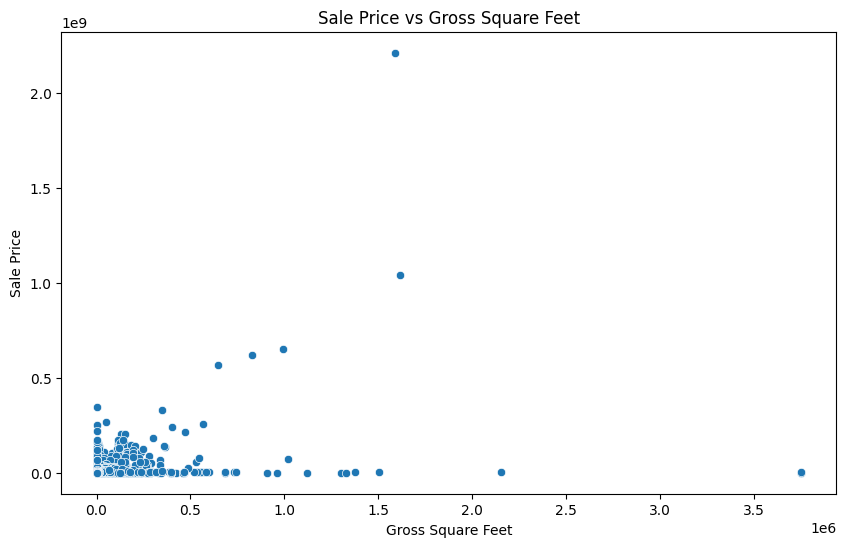

In [ ]:
# Scatter plot for 'SALE PRICE' vs 'GROSS SQUARE FEET'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=nyc_sales_data)
plt.title('Sale Price vs Gross Square Feet')
plt.xlabel('Gross Square Feet')
plt.ylabel('Sale Price')
plt.show()

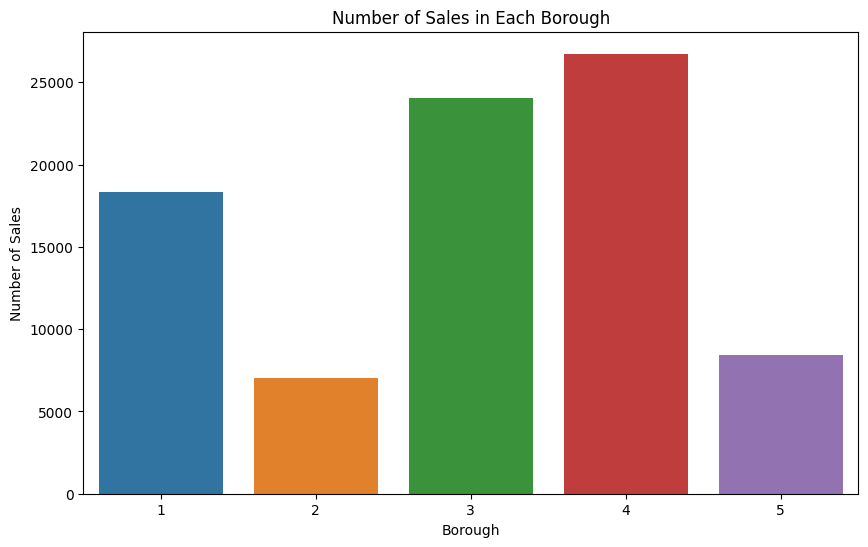

In [ ]:
# Count plot for 'BOROUGH'
plt.figure(figsize=(10, 6))
sns.countplot(x='BOROUGH', data=nyc_sales_data)
plt.title('Number of Sales in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Sales')
plt.show()

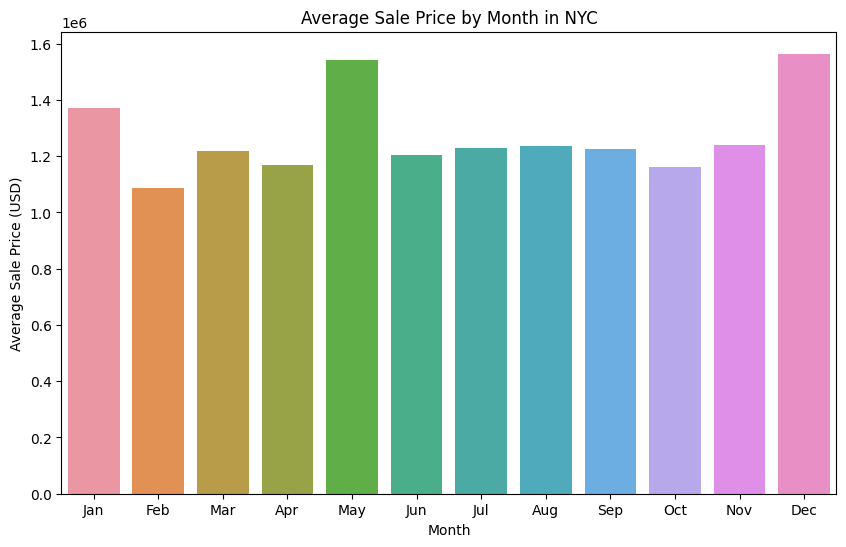

In [ ]:
# Convert 'SALE DATE' to datetime and extract the month
nyc_sales_data['SALE DATE'] = pd.to_datetime(nyc_sales_data['SALE DATE'])
nyc_sales_data['SALE MONTH'] = nyc_sales_data['SALE DATE'].dt.month

# Group by 'SALE MONTH' and calculate the average 'SALE PRICE'
monthly_avg_sales = nyc_sales_data.groupby('SALE MONTH')['SALE PRICE'].mean().reset_index()

# Map the 'SALE MONTH' numbers to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
monthly_avg_sales['SALE MONTH'] = monthly_avg_sales['SALE MONTH'].map(month_names)

# Plotting the average sale price by month
plt.figure(figsize=(10, 6))
sns.barplot(x='SALE MONTH', y='SALE PRICE', data=monthly_avg_sales)
plt.title('Average Sale Price by Month in NYC')
plt.xlabel('Month')
plt.ylabel('Average Sale Price (USD)')
plt.show()

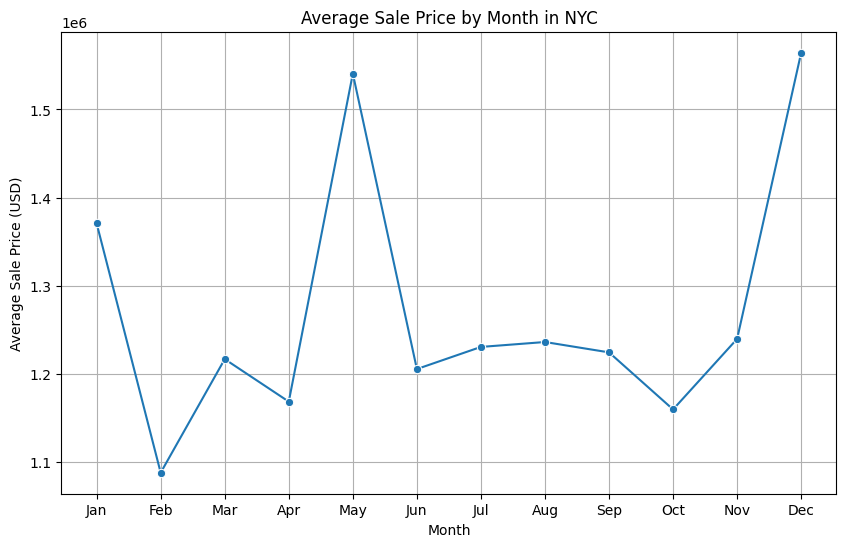

In [ ]:
# Plotting the average sale price by month using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='SALE MONTH', y='SALE PRICE', data=monthly_avg_sales, marker='o')
plt.title('Average Sale Price by Month in NYC')
plt.xlabel('Month')
plt.ylabel('Average Sale Price (USD)')
plt.grid(True)
plt.show()

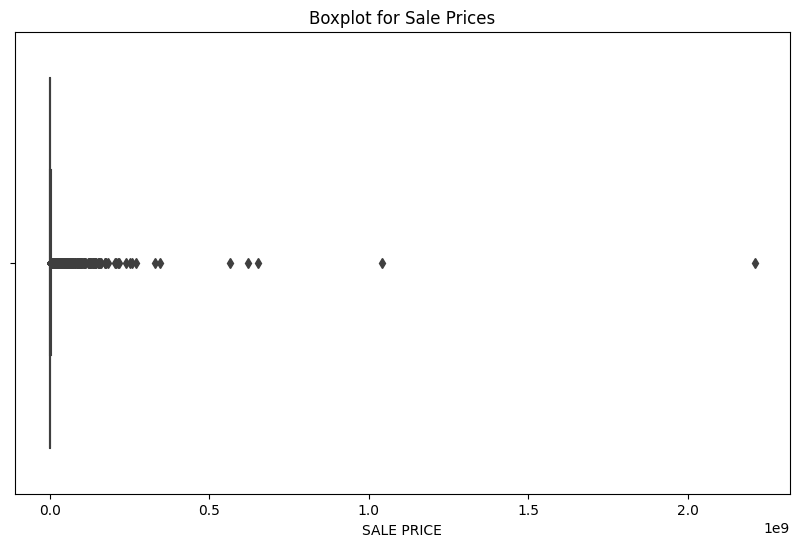

In [ ]:
# Boxplot for 'SALE PRICE' to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=nyc_sales_data['SALE PRICE'])
plt.title('Boxplot for Sale Prices')
plt.show()

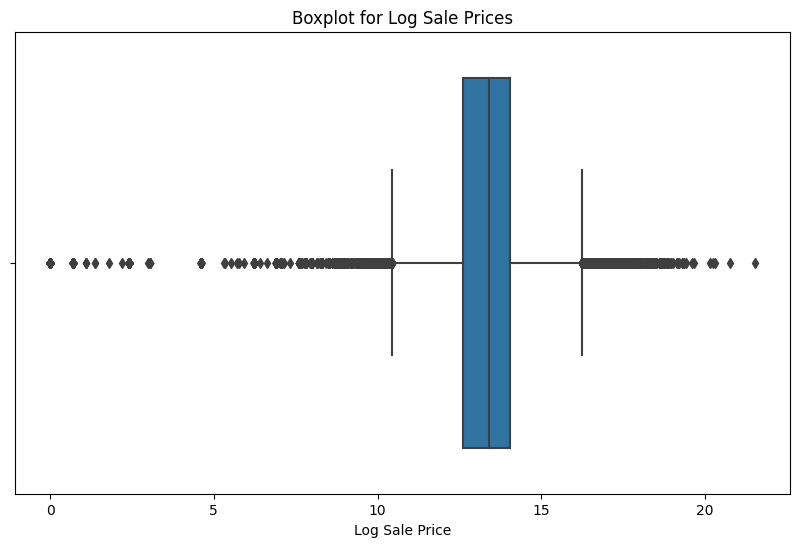

In [ ]:
# Apply log transformation to 'SALE PRICE'
nyc_sales_data['LOG_SALE PRICE'] = np.log1p(nyc_sales_data['SALE PRICE'])

# Boxplot with log transformation
plt.figure(figsize=(10, 6))
sns.boxplot(x=nyc_sales_data['LOG_SALE PRICE'])
plt.title('Boxplot for Log Sale Prices')
plt.xlabel('Log Sale Price')
plt.show()

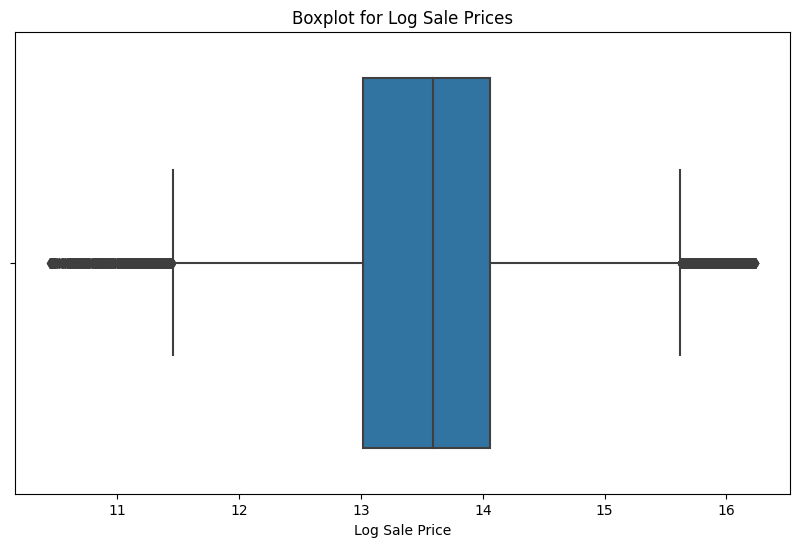

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) of the log-transformed 'SALE PRICE'
Q1 = nyc_sales_data['LOG_SALE PRICE'].quantile(0.25)
Q3 = nyc_sales_data['LOG_SALE PRICE'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
nyc_sales_data_filtered = nyc_sales_data[(nyc_sales_data['LOG_SALE PRICE'] >= lower_bound) & (nyc_sales_data['LOG_SALE PRICE'] <= upper_bound)]

# Boxplot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=nyc_sales_data_filtered['LOG_SALE PRICE'])
plt.title('Boxplot for Log Sale Prices')
plt.xlabel('Log Sale Price')
plt.show()

In [ ]:
# Extract year and month from 'SALE DATE'
nyc_sales_data['YEAR'] = nyc_sales_data['SALE DATE'].dt.year
nyc_sales_data['MONTH'] = nyc_sales_data['SALE DATE'].dt.month

# Group by year and month to calculate the average sale price
monthly_trends = nyc_sales_data.groupby(['YEAR', 'MONTH'])['SALE PRICE'].mean().reset_index()

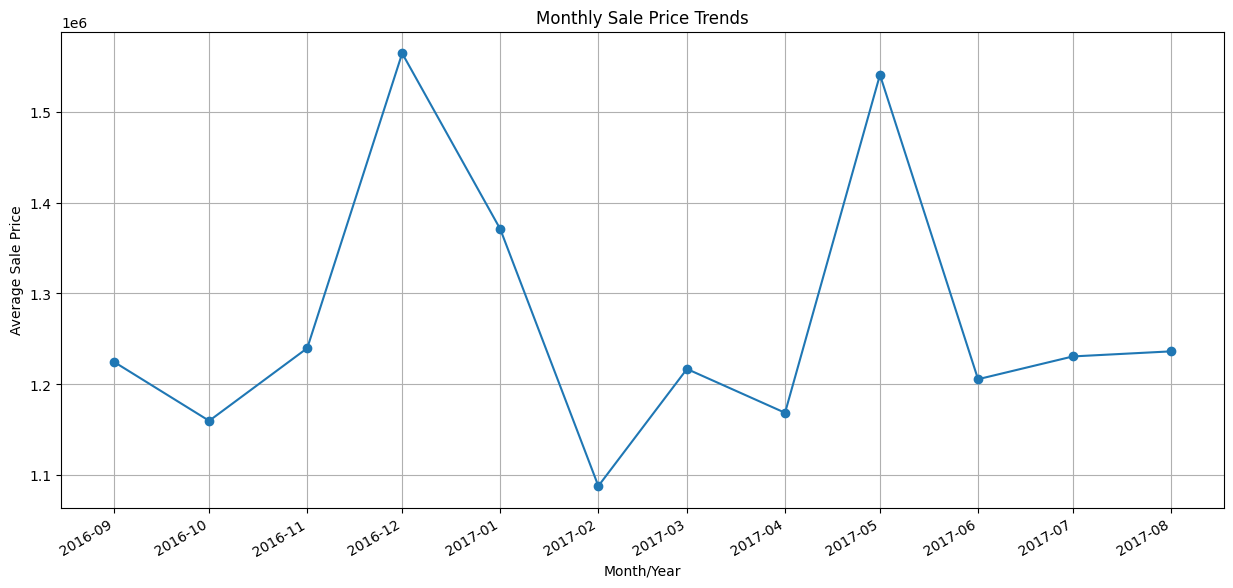

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Tambahkan kolom 'YEAR_MONTH' untuk analisis
nyc_sales_data['YEAR_MONTH'] = nyc_sales_data['SALE DATE'].dt.strftime('%Y-%m')

# Group data by 'YEAR_MONTH' and get the average of 'SALE PRICE'
monthly_avg_sale_price = nyc_sales_data.groupby('YEAR_MONTH')['SALE PRICE'].mean().reset_index()

# Convert 'YEAR_MONTH' back to datetime
monthly_avg_sale_price['YEAR_MONTH'] = pd.to_datetime(monthly_avg_sale_price['YEAR_MONTH'])

# Sort the DataFrame by 'YEAR_MONTH'
monthly_avg_sale_price.sort_values('YEAR_MONTH', inplace=True)

# Create a new figure and set the size
plt.figure(figsize=(15, 7))

# Plot the data
plt.plot(monthly_avg_sale_price['YEAR_MONTH'], monthly_avg_sale_price['SALE PRICE'], marker='o')

# Set x-axis major locator to month and formatter to DateFormatter
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate the x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Set the title and labels
plt.title('Monthly Sale Price Trends')
plt.xlabel('Month/Year')
plt.ylabel('Average Sale Price')

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

Dalam periode yang ditampilkan dalam grafik, harga jual rata-rata properti mengalami beberapa perubahan yang menonjol. Pada akhir tahun 2016, harga cenderung stabil dengan sedikit peningkatan. Namun, memasuki awal tahun 2017, harga mengalami penurunan yang cukup drastis, menunjukkan adanya kemungkinan perlambatan di pasar atau mungkin adanya perubahan kebijakan yang mempengaruhi minat pembeli.

Tidak lama setelah penurunan itu, harga jual rata-rata mengalami rebound yang kuat, dengan puncak yang sangat mencolok di awal tahun, yang mungkin menandakan transaksi besar di pasar, seperti penjualan properti besar atau komersial yang mengangkat rata-rata harga secara keseluruhan.

Namun, setelah puncak tersebut, terlihat ada penurunan tajam lainnya yang berlangsung selama beberapa bulan, sebelum harga kembali stabil dan mulai naik secara perlahan. Penurunan tajam ini bisa jadi merupakan indikasi dari berbagai faktor, seperti penyesuaian pasar setelah penjualan besar atau mungkin reaksi terhadap faktor ekonomi makro.

Pada pertengahan tahun 2017, harga stabil kembali dan tren menunjukkan kenaikan yang moderat menuju akhir periode yang tercatat. Kestabilan ini mungkin menunjukkan bahwa pasar telah menemukan keseimbangan baru setelah fluktuasi yang terjadi sebelumnya.

Secara keseluruhan, grafik ini menunjukkan bahwa pasar properti dalam periode tersebut tidak stabil dan dipengaruhi oleh sejumlah faktor yang menyebabkan perubahan harga jual rata-rata dari bulan ke bulan. Untuk memahami sepenuhnya apa yang menyebabkan pergerakan harga ini, diperlukan analisis lebih mendalam tentang kondisi pasar lokal, kebijakan pemerintah yang relevan, dan faktor ekonomi yang lebih luas.

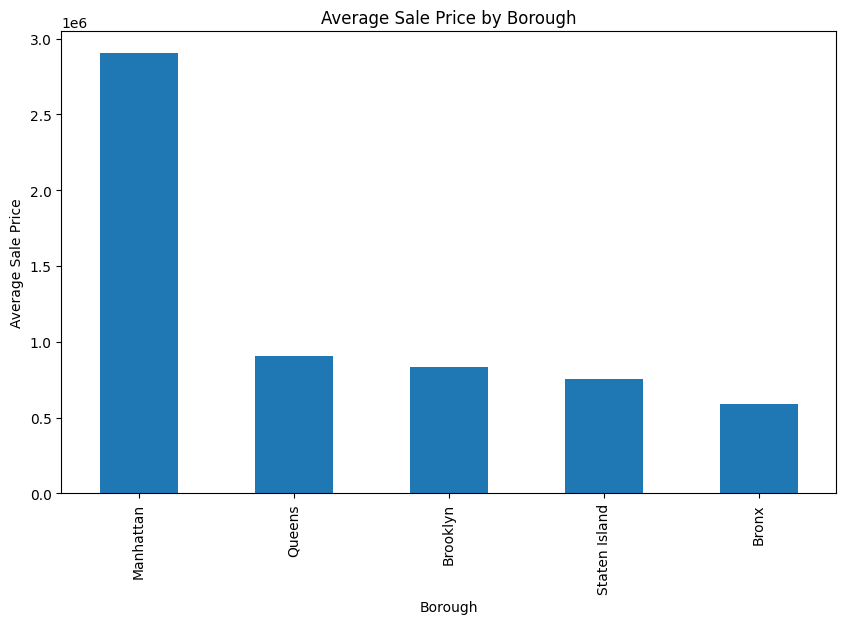

In [ ]:
borough_dict = {1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'}
nyc_sales_data['BOROUGH'] = nyc_sales_data['BOROUGH'].replace(borough_dict)
borough_price_avg = nyc_sales_data.groupby('BOROUGH')['SALE PRICE'].mean().sort_values(ascending=False)
borough_price_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sale Price by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Sale Price')
plt.show()

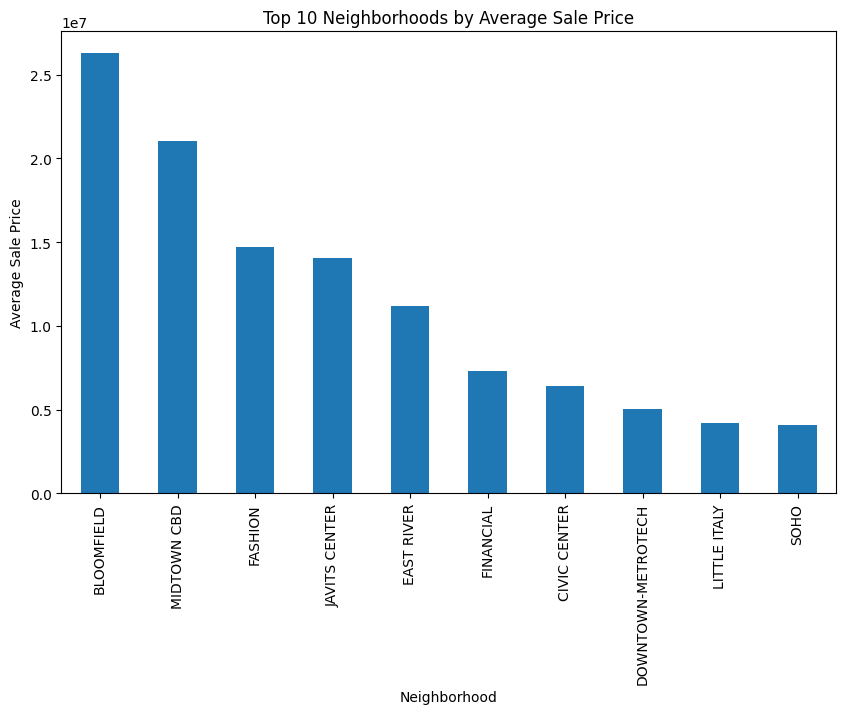

In [ ]:
neighborhood_price_avg = nyc_sales_data.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().sort_values(ascending=False)

neighborhood_price_avg.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Neighborhoods by Average Sale Price')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.show()

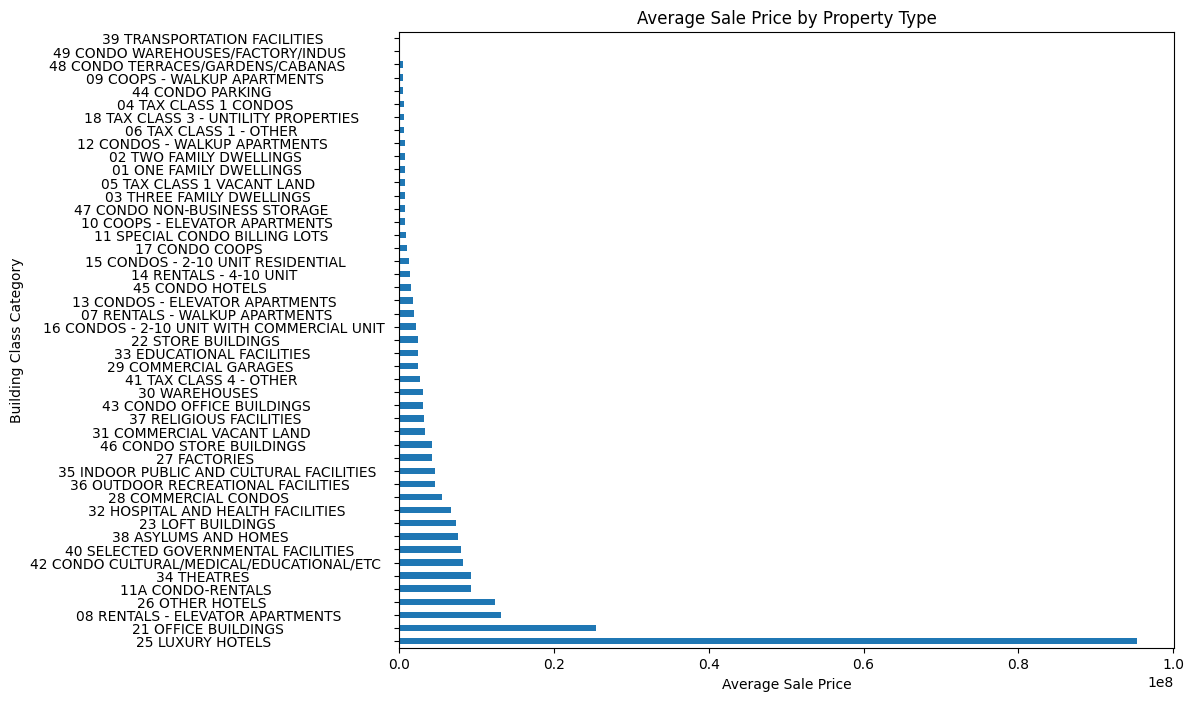

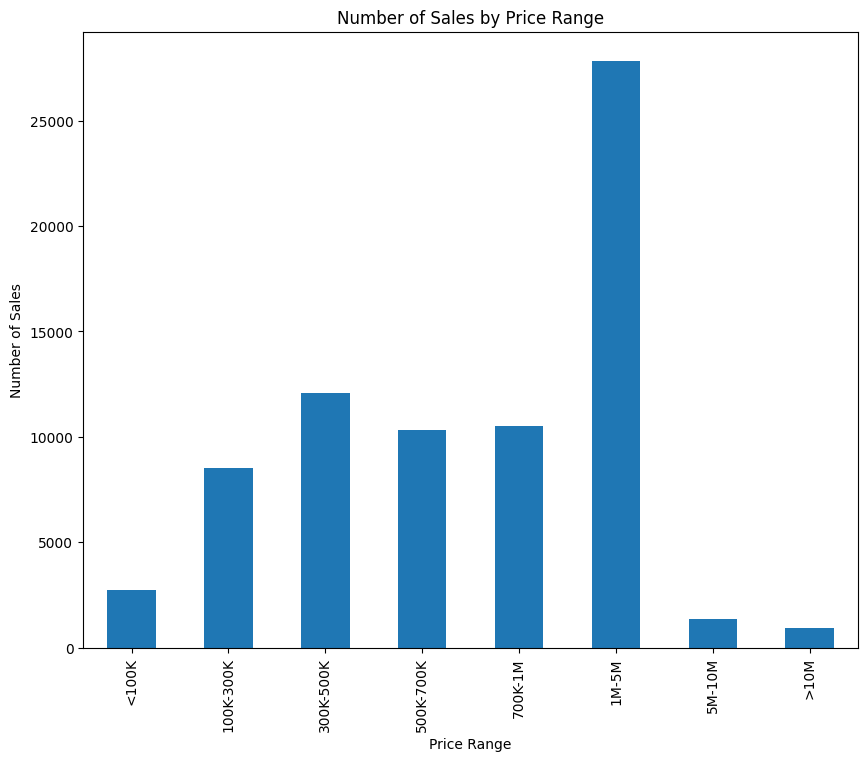

In [ ]:
# Segmentasi berdasarkan jenis properti
property_type_segmentation = nyc_sales_data.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
property_type_segmentation.plot(kind='barh')
plt.title('Average Sale Price by Property Type')
plt.xlabel('Average Sale Price')
plt.ylabel('Building Class Category')
plt.show()

# Segmentasi berdasarkan rentang harga (asumsi 'SALE PRICE' adalah numerik)
price_bins = [0, 100000, 300000, 500000, 700000, 1000000, 5000000, 10000000, nyc_sales_data['SALE PRICE'].max()]
price_labels = ['<100K', '100K-300K', '300K-500K', '500K-700K', '700K-1M', '1M-5M', '5M-10M', '>10M']
nyc_sales_data['PRICE RANGE'] = pd.cut(nyc_sales_data['SALE PRICE'], bins=price_bins, labels=price_labels)

price_range_segmentation = nyc_sales_data.groupby('PRICE RANGE')['SALE PRICE'].count()

plt.figure(figsize=(10, 8))
price_range_segmentation.plot(kind='bar')
plt.title('Number of Sales by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Sales')
plt.show()

#Conclusion
The conclusion drawn from the visual data reflects the vibrant and multifaceted nature of New York City's real estate market. Manhattan emerges as the epicenter of high-value real estate, with average sale prices far surpassing those in other boroughs, highlighting its status as a premier and highly sought-after location for both residential and commercial properties. The variation in average sale prices among neighborhoods underscores the importance of location in property valuation, with some areas like Bloomfield and Midtown CBD commanding premium prices.

The type of property has a substantial impact on market prices as well, with industrial and commercial facilities fetching top dollar, indicating strong demand for business-related real estate within the city's bustling hubs. In contrast, residential properties, particularly those offering basic amenities, tend to have a more moderate pricing structure, suggesting a broader market reach.

Seasonal trends are apparent in the market, with certain months witnessing significant peaks in average sale prices, possibly due to seasonal buying patterns, economic events, or policy changes affecting the market's tempo.

In essence, the data narrates the dynamic pulse of New York City's real estate market, a continuous interplay of location, property type, and timing, each influencing the ebb and flow of property values in one of the most dynamic urban landscapes in the world.

Interpretation of the data suggests several key insights into the New York City real estate market:

1. **Market Heterogeneity**: The disparities in average sale prices between different neighborhoods and property types highlight the heterogeneous nature of the market. High-value areas such as Manhattan and certain neighborhoods like Bloomfield command premium prices due to their desirable location and possibly the types of properties available.

2. **Commercial Real Estate Value**: The higher average sale prices for industrial and commercial spaces reflect a robust demand for these properties. This demand could be driven by New York City's status as a global business and commercial hub.

3. **Residential Market Breadth**: The more moderate average prices for residential properties, especially those with basic amenities, suggest a wider and more accessible market. There is likely a steady demand from a broader population base for these types of properties.

4. **Seasonal Fluctuations**: The variability in prices throughout the year could indicate opportunities for strategic timing in the buying and selling of properties, with certain months offering potentially better conditions for transactions.

Based on these interpretations, here are some business recommendations:

1. **Diversify Investment Portfolio**: Investors should consider diversifying their portfolio across different property types and neighborhoods to mitigate risk. While premium properties in high-value locations offer the potential for substantial returns, they also come with higher acquisition costs and may be sensitive to market fluctuations.

2. **Focus on Commercial Developments**: Developers and investors might look into expanding their commercial real estate holdings, especially in high-demand areas, to capitalize on the strong market for business properties.

3. **Target Residential Development**: Given the broader demand for residential properties, there is an opportunity for development projects that focus on mid-range housing, which could appeal to a wider audience.

4. **Strategic Timing for Transactions**: Sellers could aim to list properties during months where historical data shows higher average sale prices, whereas buyers might seek opportunities when prices are traditionally lower.

5. **Monitor Market Trends**: Continuously monitoring market trends for shifts in consumer behavior, economic changes, and policy updates can help businesses and investors make informed decisions and adapt their strategies accordingly.

In conclusion, businesses and investors in the NYC real estate market should take a data-informed approach, considering location, property type, and timing to maximize their investment returns and strategic growth.